# Demo

In [3]:
import os
import re
import copy

os.environ["ASTROPILOT_DISABLE_DISPLAY"] = "false"
import cmbagent
import autogen
autogen.cmbagent_disable_display

False

In [4]:
task = r"""
compute and plot temperature cmb cls in flat lcdm
"""

/Users/boris/CMBAgents/ag2/autogen/agentchat/conversable_agent.py:129: UserWarning: Update function string contains no variables. This is probably unintended.
  warnings.warn("Update function string contains no variables. This is probably unintended.")



compute and plot temperature cmb cls in flat lcdm


--------------------------------------------------------------------------------

Calling camb_context...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gemini-2.5-flash-preview-04-17,camb_context,0.01177,66620,2964,69584


**File Search Task:**

Search the provided documentation for methods within the `camb` package that allow for the computation and retrieval of Cosmic Microwave Background (CMB) angular power spectra, specifically the temperature (TT) spectrum. Identify how to set cosmological parameters for a flat Lambda-CDM (LCDM) model, execute the calculation, and access the results in a format suitable for plotting. Also, find information on the units and output format of the power spectra.

**Files Consulted:**

*   https://camb.readthedocs.io/en/latest/index.html
*   https://camb.readthedocs.io/en/latest/camb.html
*   https://camb.readthedocs.io/en/latest/model.html
*   https://camb.readthedocs.io/en/latest/results.html
*   https://camb.readthedocs.io/en/latest/CAMBdemo.html

**Results:**

To compute and plot temperature CMB $C_\ell$ in a flat LCDM model using `camb`, the following steps and methods are needed:

1.  **Set up cosmological parameters:** The `camb.set_params` function is a convenien

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-2024-11-20,camb_response_formatter,0.02429,3036,1670,4706


**File Search Task:**

Search for methods to compute and plot the temperature CMB power spectrum in a flat LCDM model using the CAMB library.

**Files Consulted:**
- https://camb.readthedocs.io/en/latest/index.html
- https://camb.readthedocs.io/en/latest/camb.html
- https://camb.readthedocs.io/en/latest/model.html
- https://camb.readthedocs.io/en/latest/results.html
- https://camb.readthedocs.io/en/latest/CAMBdemo.html

**Results:**
The CAMB library provides methods to compute and retrieve the temperature CMB power spectrum for a flat LCDM model. The key steps involve setting cosmological parameters using `camb.set_params`, performing the calculation with `camb.get_results`, and accessing the power spectrum data via `CAMBdata.get_cmb_power_spectra`. The results can be plotted using standard Python libraries like Matplotlib.

**Docstrings:**
["### camb.set_params(cp=None, verbose=False, **params)\n\nSet all CAMB parameters at once, including parameters which are part of the CAMBparams s

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,engineer,0.02041,5895,1077,6972


**Code Explanation:**

This code computes and plots the CMB temperature (TT) angular power spectrum ($\ell(\ell+1)C_\ell^{TT}/2\pi$) for a flat $\Lambda$CDM cosmology using the CAMB library. It sets standard cosmological parameters, runs the calculation, extracts the lensed TT spectrum in $\mu K^2$ units, and saves a high-resolution plot in the `data/` directory. The plot includes detailed axis labels with units, a title, and grid lines. The code also prints a concise description of the plot and the first few values of the computed spectrum for verification.

**Python Code:**

```python
import camb
import numpy as np
import matplotlib.pyplot as plt
import os
import time

def compute_and_plot_cmb_tt_cls(database_path="data/", lmax=2500):
    r"""
    Compute and plot the CMB temperature (TT) angular power spectrum for a flat LCDM model using CAMB.

    Parameters
    ----------
    database_path : str
        Path to the directory where the plot will be saved.
    lmax : int
        Max

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,engineer_response_formatter,0.00872,1840,1521,3361


**Code Explanation:**

This code computes and plots the CMB temperature (TT) angular power spectrum (l(l+1)C_l^{TT}/2pi) for a flat LCDM cosmology using the CAMB library. It sets standard cosmological parameters, runs the calculation, extracts the lensed TT spectrum in muK^2 units, and saves a high-resolution plot in the data/ directory. The plot includes detailed axis labels with units, a title, and grid lines. The code also prints a concise description of the plot and the first few values of the computed spectrum for verification.

**Python Code:**

```python
# filename: codebase/compute_and_plot_cmb_tt.py
import camb
import numpy as np
import matplotlib.pyplot as plt
import os
import time


def compute_and_plot_cmb_tt_cls(database_path="data/", lmax=2500):
    r"""
    Compute and plot the CMB temperature (TT) angular power spectrum for a flat LCDM model using CAMB.

    Parameters
    ----------
    database_path : str
        Path to the directory where the plot will be saved.
   

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,executor_response_formatter,0.00179,1475,37,1512



--------------------------------------------------------------------------------
Execution status: success. Transfer to control.

xxxxxxxxxxxxxxxxxxxxxxxxxx

Workflow status:

Plan step number: 1

Agent for sub-task (might be different from the next agent suggestion for debugging): camb_context

Current status (before execution): In progress

xxxxxxxxxxxxxxxxxxxxxxxxxx



--------------------------------------------------------------------------------

Calling control...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,control,0.01520,7440,40,7480



--------------------------------------------------------------------------------


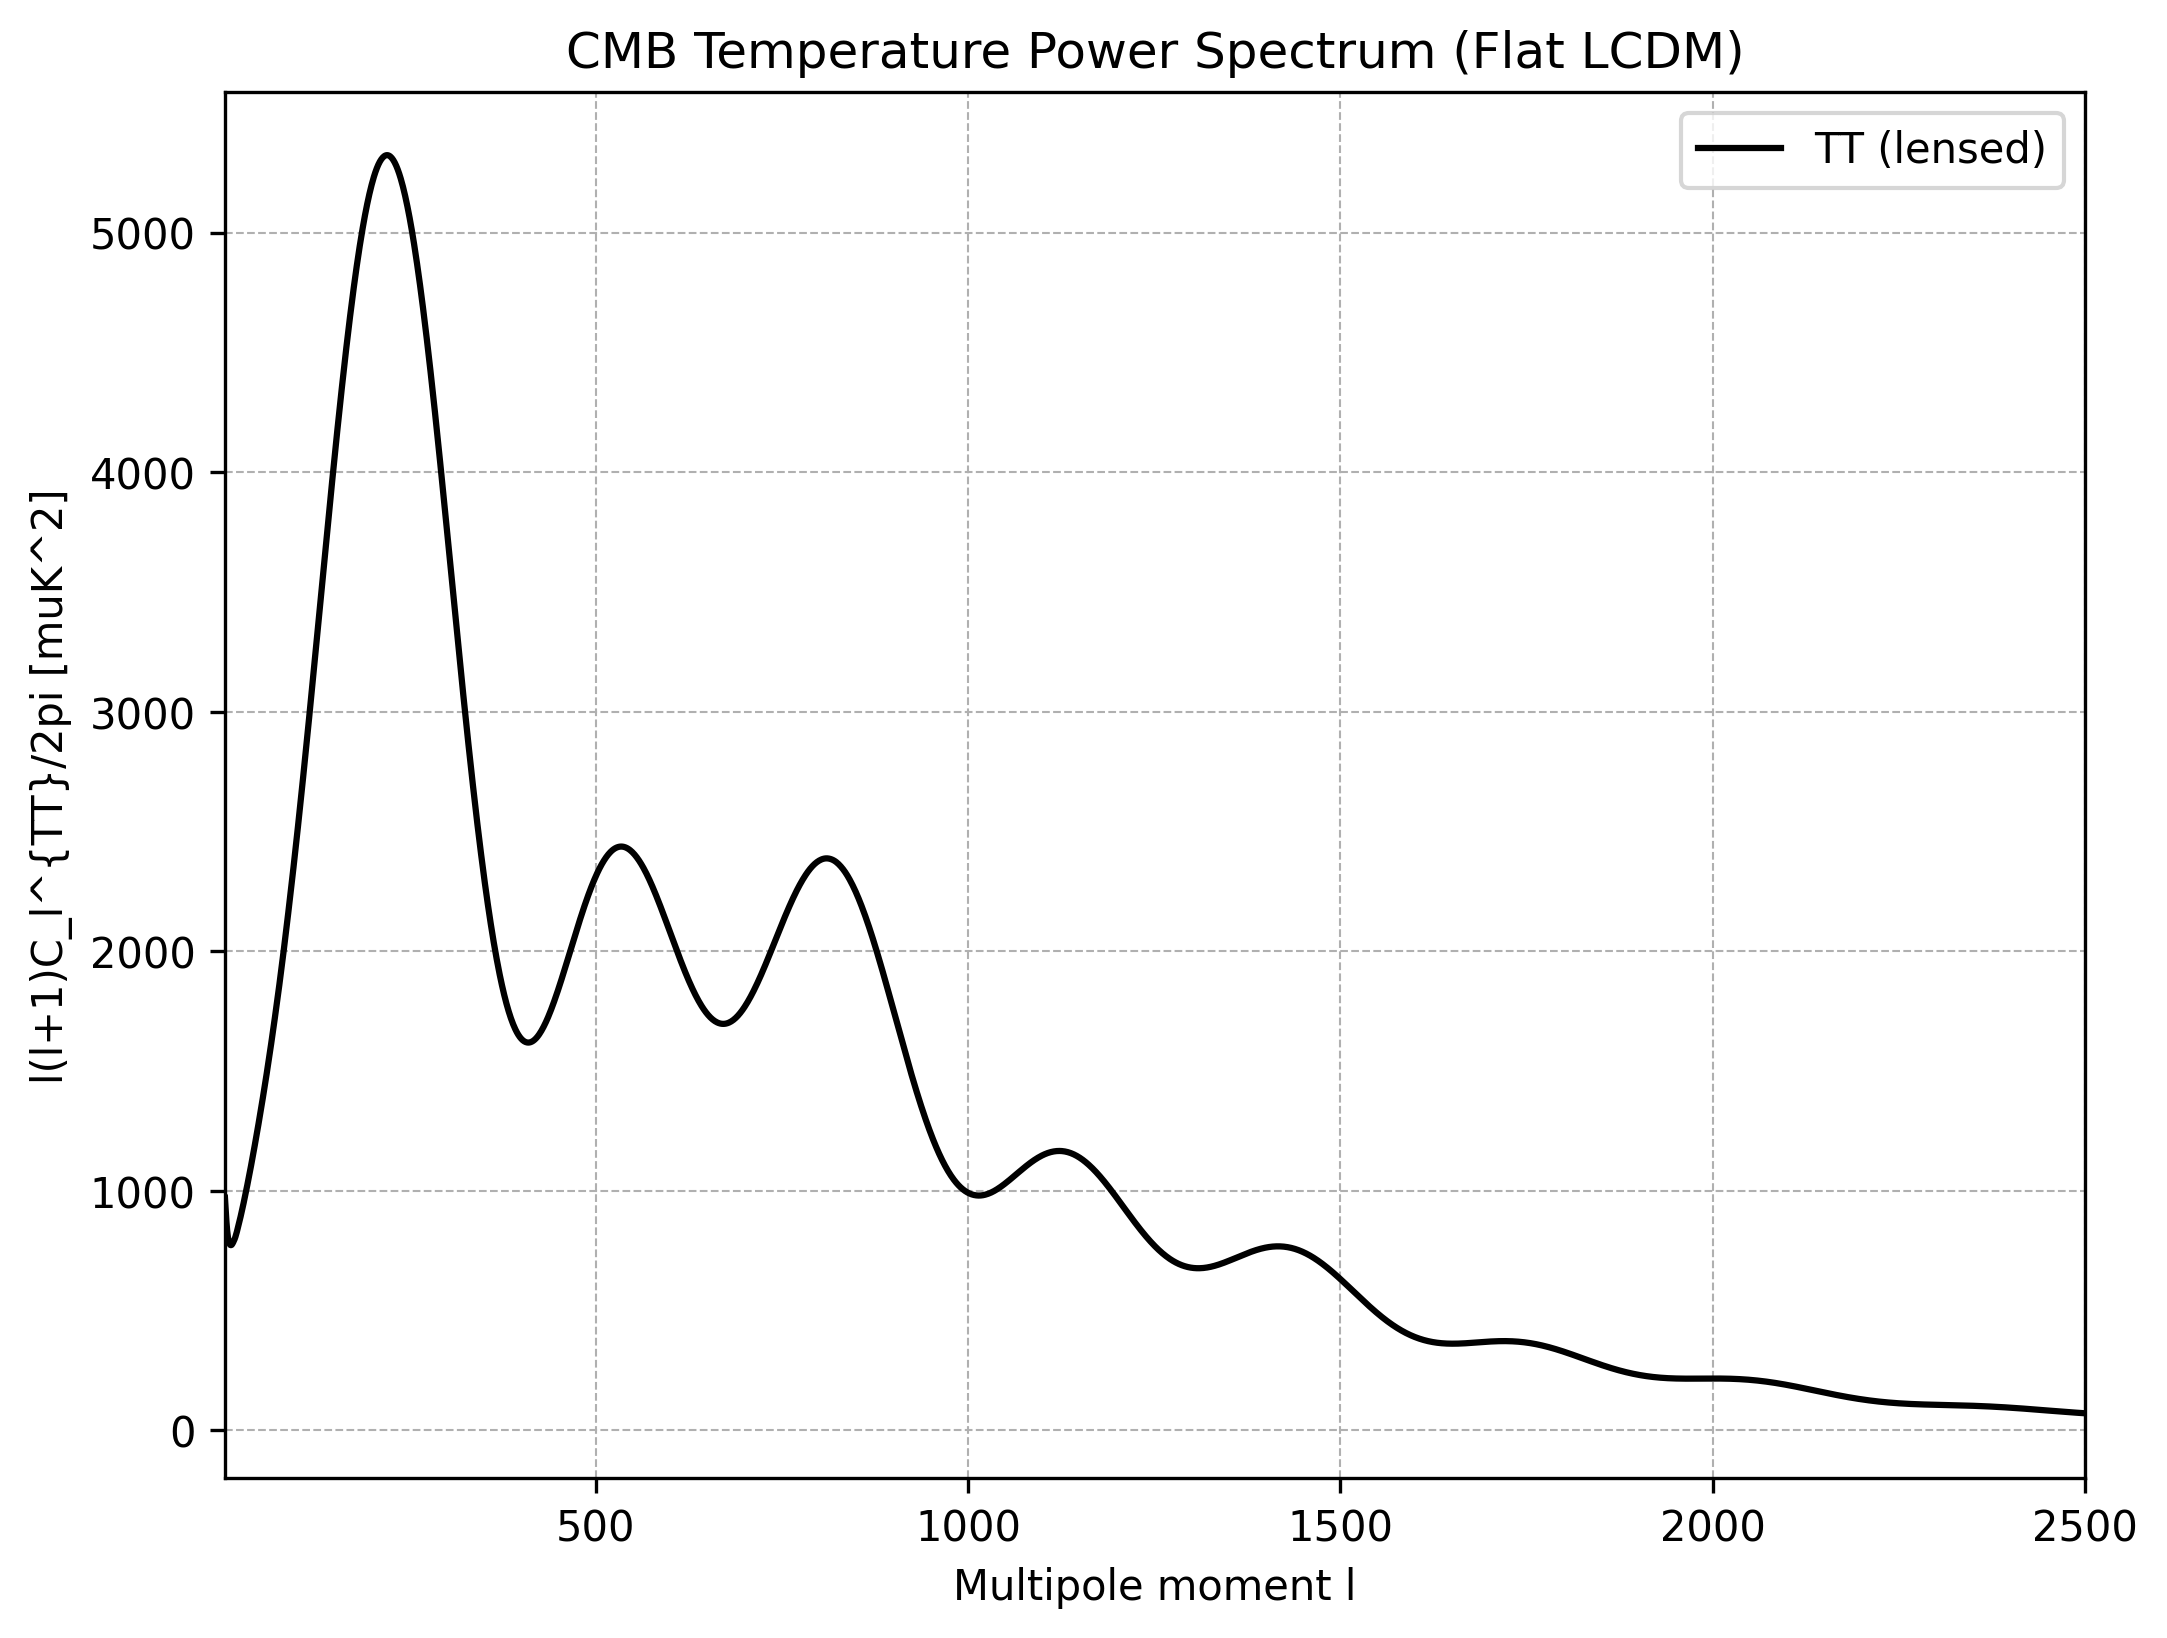


**Step number:** 1 out of 1.
 
**Sub-task:** solve the main task.
 
**Agent in charge of sub-task:** `camb_context`
 
**Instructions:**
 
solve the main task.
 
**Status:** completed ✅
        

--------------------------------------------------------------------------------
Terminating...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,terminator,0.01397,6983,1,6984



--------------------------------------------------------------------------------
Session terminated.

--------------------------------------------------------------------------------

Displaying cost…

| Agent                       | Cost ($)    | Prompt Tokens | Completion Tokens | Total Tokens |
|:----------------------------|------------:|--------------:|------------------:|-------------:|
| executor response formatter | $0.00178530 |          1475 |                37 |         1512 |
| engineer response formatter | $0.00871640 |          1840 |              1521 |         3361 |
| camb context                | $0.01177140 |         66620 |              2964 |        69584 |
| terminator                  | $0.01397400 |          6983 |                 1 |         6984 |
| camb response formatter     | $0.02429000 |          3036 |              1670 |         4706 |
| control                     | $0.01520000 |          7440 |                40 |         7480 |
| engineer           

In [5]:
results = cmbagent.one_shot(task,
                   max_rounds=20,
                   agent='camb_context',
                  )

